In [1]:
import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2'

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/cdv

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
from pathlib import Path
import pyrallis
from cdv.config import MainConfig
import orbax.checkpoint as ocp

from cdv.training_state import TrainingRun
from cdv.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
# run_dir = Path('logs') / 'e_form_equivariant_patch_235'
# run_dir = Path('logs') / '04-13-interrupted-919'
# run_dir = Path('logs') / '04-13-14_650'
run_dir = Path('logs') / 'mace_vae_rec_407'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_vae()

ckpt = best_ckpt(run_dir)
# ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.bfloat16), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nmiklaucic/cdv/logs/mace_vae_rec_407/final_ckpt/ckpts

Restoring item from /home/nmiklaucic/cdv/logs/mace_vae_rec_407/final_ckpt/ckpts/41799.

Finished restoring checkpoint from /home/nmiklaucic/cdv/logs/mace_vae_rec_407/final_ckpt/ckpts/41799.

In [5]:
from cdv.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_structure(params);
debug_stat(params);

arg0
├── decoder >>> decoder >>> mace
│   ├── global_proj_mlp >>> Dense_0
│   │   ├── bias
│   │   │   └── f32[128]
│   │   └── kernel
│   │       └── f32[256, 128]
│   ├── layer_0
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └── f32[32, 1, 128]
│   │   │   │   ├── w1_1o
│   │   │   │   │   └── f32[32, 1, 128]
│   │   │   │   ├── w2_0e
│   │   │   │   │   └── f32[32, 4, 128]
│   │   │   │   ├── w2_1o
│   │   │   │   │   └── f32[32, 3, 128]
│   │   │   │   ├── w3_0e
│   │   │   │   │   └── f32[32, 8, 128]
│   │   │   │   └── w3_1o
│   │   │   │       └── f32[32, 12, 128]
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 128x0e,128x0e
│   │   │       │   └── f32[128, 128]
│   │   │       └── w[1,1] 128x1o,128x1o
│   │   │           └── f32[128, 128]
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[1,1] 128x1o,128x1o
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   ├── w[2,2] 128x2e,128x2e
│   │   │   │   │   └── f32[128, 128]
│   │   │   │   └── w[3,3] 128x3o,128x3o
│   │   │   │       └── f32[128, 128]
│   │   │   └── linear_up >>> w[0,0] 128x0e,128x0e
│   │   │       └── f32[128, 128]
│   │   ├── LinearReadoutBlock_0 >>> Linear_0 >>> w[1,0] 128x1o,1x1o
│   │   │   └── f32[128, 1]
│   │   └── MessagePassingConvolution_0
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── f32[512]
│   │       │   └── scale
│   │       │       └── f32[512]
│   │       └── radial_mix >>> Dense_0
│   │           ├── bias
│   │           │   └── f32[512]
│   │           └── kernel
│   │               └── f32[10, 512]
│   ├── layer_1
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └── f32[32, 1, 128]
│   │   │   │   ├── w1_1o
│   │   │   │   │   └── f32[32, 1, 128]
│   │   │   │   ├── w2_0e
│   │   │   │   │   └── f32[32, 4, 128]
│   │   │   │   ├── w2_1o
│   │   │   │   │   └── f32[32, 3, 128]
│   │   │   │   ├── w3_0e
│   │   │   │   │   └── f32[32, 8, 128]
│   │   │   │   └── w3_1o
│   │   │   │       └── f32[32, 12, 128]
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 128x0e,128x0e
│   │   │       │   └── f32[128, 128]
│   │   │       └── w[1,1] 128x1o,128x1o
│   │   │           └── f32[128, 128]
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 256x0e,128x0e
│   │   │   │   │   └── f32[256, 128]
│   │   │   │   ├── w[1,1] 384x1o,128x1o
│   │   │   │   │   └── f32[384, 128]
│   │   │   │   ├── w[2,2] 384x2e,128x2e
│   │   │   │   │   └── f32[384, 128]
│   │   │   │   └── w[3,3] 256x3o,128x3o
│   │   │   │       └── f32[256, 128]
│   │   │   └── linear_up
│   │   │       ├── w[0,0] 128x0e,128x0e
│   │   │       │   └── f32[128, 128]
│   │   │       └── w[1,1] 128x1o,128x1o
│   │   │           └── f32[128, 128]
│   │   ├── MessagePassingConvolution_0
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── f32[1280]
│   │   │   │   └── scale
│   │   │   │       └── f32[1280]
│   │   │   └── radial_mix >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── f32[1280]
│   │   │       └── kernel
│   │   │           └── f32[10, 1280]
│   │   └── NonLinearReadoutBlock_0
│   │       ├── Linear_0
│   │       │   ├── w[0,0] 128x0e,128x0e
│   │       │   │   └── f32[128, 128]
│   │       │   ├── w[0,2] 128x0e,128x0e
│   │       │   │   └── f32[128, 128]
│   │       │   └── w[1,1] 128x1o,128x1o
│   │       │       └── f32[128, 128]
│   │       └── Linear_1 >>> w[1,0] 128x1o,1x1o
│   │           └── f32[128, 1]
│   └── node_embedding >>> embed >>> embedding
│       └── f32[72, 128]
├── encoder
│   ├── encoder >>> mace
│   │   ├── layer_0
│   │   │   ├── Equiva

arg0
├── decoder >>> decoder >>> mace
│   ├── global_proj_mlp >>> Dense_0
│   │   ├── bias
│   │   │   └──     (  -0.402   -0.212  -0.0588    0.201    0.394) -0.00855 ±    0.223
│   │   └── kernel
│   │       └──     (  -0.488  -0.0415   0.0182   0.0713    0.425)    0.017 ±   0.0835~
│   ├── layer_0
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └──     (    -2.7   -0.529  -0.0244    0.508     2.58)  -0.0152 ±    0.763
│   │   │   │   ├── w1_1o
│   │   │   │   │   └──     (    -2.6    -0.52  -0.0219    0.488      2.5) -0.00763 ±    0.758
│   │   │   │   ├── w2_0e
│   │   │   │   │   └──     (   -3.07   -0.506  -0.0502    0.637     3.41)   0.0445 ±    0.758~
│   │   │   │   ├── w2_1o
│   │   │   │   │   └──     (      -3   -0.719   -0.168    0.377     3.31)  -0.0997 ±     0.82~
│   │   │   │   ├── w3_0e
│   │   │   │   │   └──     (   -3.68   -0.696   -0.134    0.487     3.95)  -0.0625 ±    0.866~
│   │   │   │   └── w3_1o
│   │   │   │       └──     (   -3.38   -0.571  -0.0328    0.534     3.59)  -0.0324 ±     0.82~
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 128x0e,128x0e
│   │   │       │   └──     (   -2.87   -0.611   0.0447    0.503     3.21)   0.0176 ±    0.756~
│   │   │       └── w[1,1] 128x1o,128x1o
│   │   │           └──     (   -3.37   -0.323   0.0673    0.561     2.78)   0.0414 ±    0.761~
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 128x0e,128x0e
│   │   │   │   │   └──     (   -3.63   -0.497   0.0602    0.555     3.52)   0.0965 ±    0.813~
│   │   │   │   ├── w[1,1] 128x1o,128x1o
│   │   │   │   │   └──     (   -3.38   -0.483  -0.0129    0.439     3.28)    0.012 ±    0.833~
│   │   │   │   ├── w[2,2] 128x2e,128x2e
│   │   │   │   │   └──     (   -2.75    -0.65  -0.0138    0.478     3.35)  -0.0387 ±    0.806~
│   │   │   │   └── w[3,3] 128x3o,128x3o
│   │   │   │       └──     (   -2.91   -0.589   0.0172    0.456     3.07)    0.028 ±    0.802~
│   │   │   └── linear_up >>> w[0,0] 128x0e,128x0e
│   │   │       └──     (   -3.03   -0.705  -0.0119    0.593     3.09)  -0.0205 ±    0.849~
│   │   ├── LinearReadoutBlock_0 >>> Linear_0 >>> w[1,0] 128x1o,1x1o
│   │   │   └──     (   -2.34   -0.336   0.0571    0.519     1.86)   0.0826 ±    0.788
│   │   └── MessagePassingConvolution_0
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └──     (  -0.495  -0.0798   -0.012   0.0579    0.419)  -0.0112 ±    0.128
│   │       │   └── scale
│   │       │       └──     (   0.325    0.625    0.687    0.765     1.21)    0.695 ±    0.116
│   │       └── radial_mix >>> Dense_0
│   │           ├── bias
│   │           │   └──     (  -0.495  -0.0649    0.008   0.0723    0.593)  0.00657 ±     0.15
│   │           └── kernel
│   │               └──     (  -0.676  -0.0714 -0.00122   0.0678    0.792) -0.00121 ±    0.146
│   ├── layer_1
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └──     (   -2.75   -0.536  -0.0167    0.498     3.13)  -0.0162 ±    0.769
│   │   │   │   ├── w1_1o
│   │   │   │   │   └──     (   -2.67    -0.52  -0.0258    0.519     2.71) -0.00863 ±    0.766
│   │   │   │   ├── w2_0e
│   │   │   │   │   └──     (   -2.85   -0.474   0.0311    0.494     3.52)   0.0168 ±    0.829~
│   │   │   │   ├── w2_1o
│   │   │   │   │   └──     (   -3.19   -0.657  -0.0456    0.513     3.36)  0.00561 ±     0.91~
│   │   │   │   ├── w3_0e
│   │   │   │   │   └──     (   -3.97   -0.635   -0.132     0.47     3.94)  -0.0967 ±    0.825~
│   │   │   │   └── w3_1o
│   │   │   │       └──     (   -3.89   -0.498    0.114    0.613     3.52)   0.0624 ±    0.827~
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 128x0e,128x0e
│   │   │       │   └──     (   -3.14   -0.586   0.0504    0

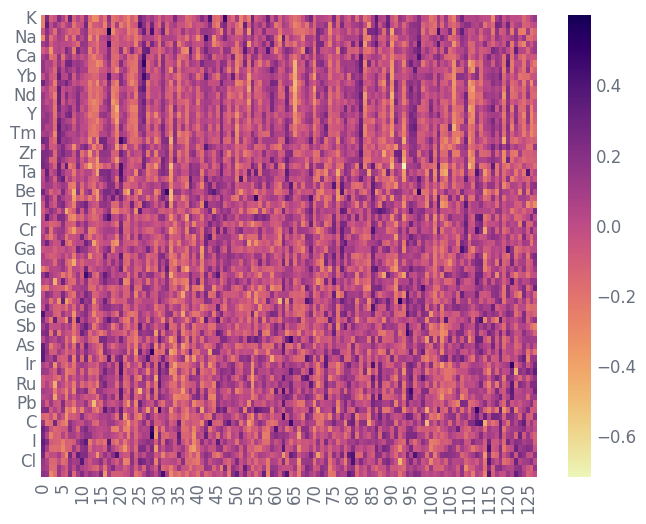

<Axes: >

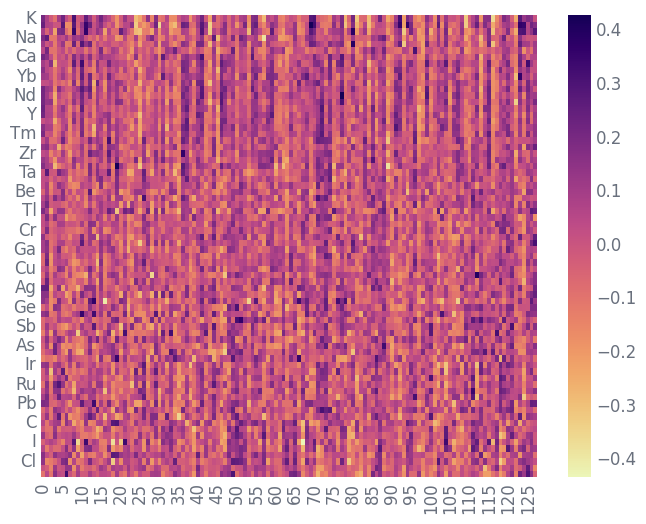

In [6]:
embed_enc = pd.DataFrame(params['encoder']['encoder']['mace']['node_embedding']['embed']['embedding'], index=config.data.metadata['elements'])
embed_dec = pd.DataFrame(params['decoder']['decoder']['mace']['node_embedding']['embed']['embedding'], index=config.data.metadata['elements'])

for df in embed_enc, embed_dec:
    df.columns = [str(x) for x in df.columns]

sns.heatmap(embed_enc, cmap='rho_heatmap')
plt.show()
sns.heatmap(embed_dec, cmap='rho_heatmap')

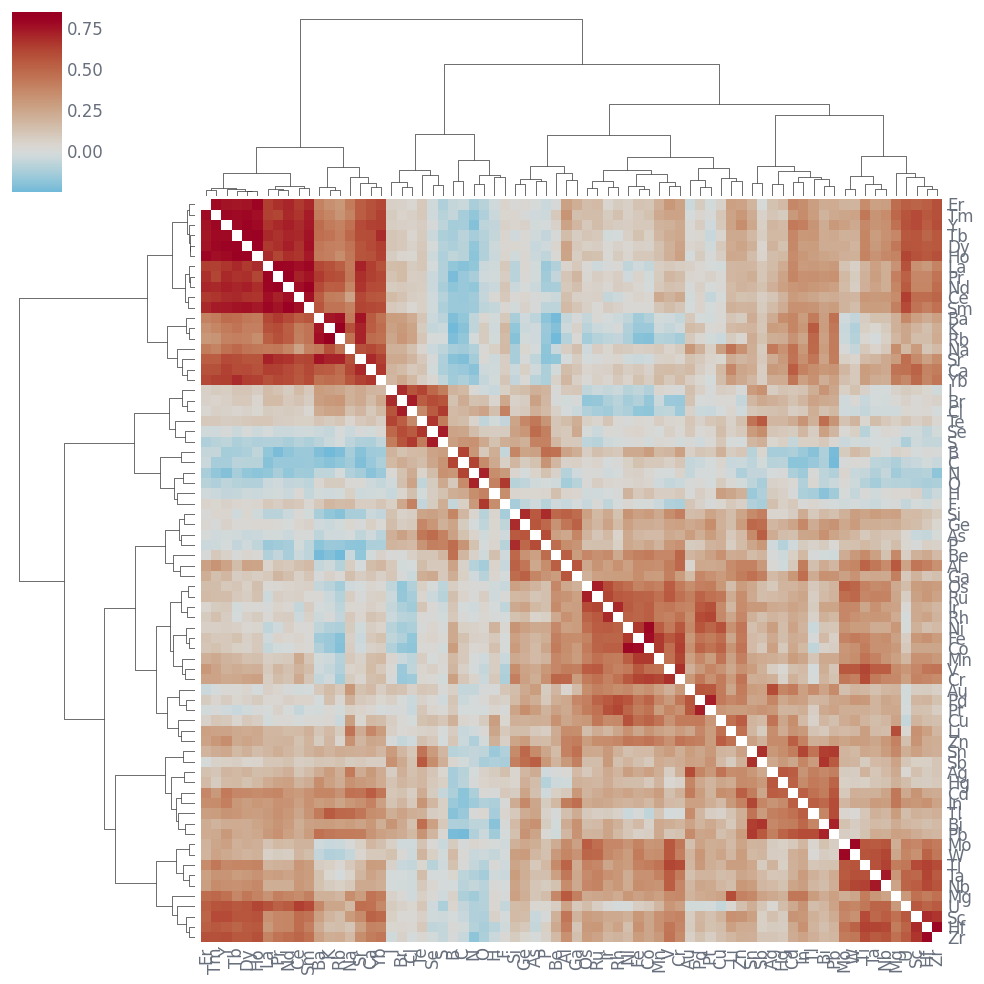

In [14]:
from scipy.spatial.distance import braycurtis, cityblock, correlation, cosine
corr = embed_dec.T.corr(method='pearson')
sns.clustermap(corr, xticklabels=1, yticklabels=1, cmap='rho_diverging', mask=np.eye(len(corr.index)), center=0,
               method='ward')

In [15]:
from cdv.dataset import load_file
from cdv.layers import Context

batch = load_file(config, 30)

rot_batch, rot_m = batch.rotate(123)

out = model.apply(ckpt['state']['params'], rngs=jr.key(123), cg=batch, ctx=Context(training=False))
rot_out = model.apply(ckpt['state']['params'], rngs=jr.key(123), cg=rot_batch, ctx=Context(training=False))

In [16]:
out, rot_out


(
    {
        'sparsity': Array(-0.34999377, dtype=float32),
        'β': Array(0.00264107, dtype=float32),
        'embed': Array(0.01056427, dtype=float32),
        'K': Array(5.8870964, dtype=float32),
        'rec': Array(0.643613, dtype=float32),
        'enc': Array(-0.06735768, dtype=float32),
        'prop': Array(0.04017966, dtype=float32),
        'e_form': Array(0.2079076, dtype=float32),
        'lat': Array(0.15056607, dtype=float32),
        'sym': Array(0.04332292, dtype=float32),
        ... +1
    },
    {
        'sparsity': Array(-0.34999377, dtype=float32),
        'β': Array(0.0026267, dtype=float32),
        'embed': Array(0.01050679, dtype=float32),
        'K': Array(5.8709674, dtype=float32),
        'rec': Array(0.6445454, dtype=float32),
        'enc': Array(-0.06737206, dtype=float32),
        'prop': Array(0.04110113, dtype=float32),
        'e_form': Array(0.20389175, dtype=float32),
        'lat': Array(0.15011922, dtype=float32),
        'sym': Array(

In [17]:
params['encoder']['latent_space']['lattice']


Array([10.669084 , 10.551612 , 10.647314 , 10.762821 , 10.586764 ,
       11.274628 , 10.698904 , 11.3689165, 10.6830225, 10.7501135,
       10.478005 , 10.672163 , 10.997329 , 11.094462 , 10.695436 ,
       10.614271 , 11.040134 , 10.650333 , 10.793168 , 10.899527 ,
       10.880529 , 10.910206 , 10.494656 , 10.966344 , 10.66385  ,
       10.5685005, 10.528406 , 10.682767 , 10.802591 , 10.609774 ,
       10.654841 , 10.736997 , 10.733537 , 10.956035 , 10.460157 ,
       10.58963  , 10.848494 , 10.399167 , 10.981409 , 10.589904 ,
       10.78044  , 10.518907 , 10.912583 , 10.757308 , 11.150147 ,
       10.6794195, 10.780637 , 10.704673 , 10.7857895, 10.612494 ,
       10.90332  , 10.644792 , 11.052185 , 11.122552 , 10.8227005,
       10.9117365, 10.73427  , 10.698818 , 10.782743 , 10.710911 ,
       10.926049 , 10.663284 , 10.640218 , 10.715799 , 11.044245 ,
       11.103562 , 10.654076 , 10.631044 , 11.359216 , 11.105693 ,
       10.665896 , 10.569139 , 10.559846 , 10.770022 , 10.462

In [18]:
z_e = model.encoder.encoder.apply({'params': ckpt['state']['params']['params']['encoder']['encoder']}, rngs=jr.key(123), cg=batch, ctx=Context(training=False))

In [19]:
z = model.encoder.apply({'params': ckpt['state']['params']['params']['encoder']}, rngs=jr.key(123), cg=batch, ctx=Context(training=False))
z


LatentOutput(
    z_e=Array([[ 0.01231274, -0.10157617,  0.27106822, ..., -0.16936138,
         0.65922743, -0.12536065],
       [-0.33440587,  0.54664314, -0.09768844, ...,  0.16060486,
         0.4357126 , -0.4182924 ],
       [ 0.03815256, -0.6464777 ,  0.70048225, ..., -0.02627132,
         0.6874268 ,  0.5365591 ],
       ...,
       [-0.37005726, -0.10221162,  0.17256463, ..., -0.35547936,
        -0.3772253 ,  0.04703698],
       [ 0.0482369 ,  0.03762473,  0.02353069, ...,  0.00671738,
         0.01547643,  0.00864229],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32),
    output=Array([[ 0.        ,  0.        ,  0.3499929 , ...,  0.        ,
         0.6999871 ,  0.        ],
       [-0.34999305,  0.6999844 ,  0.        , ...,  0.        ,
         0.34999356, -0.34999606],
       [ 0.        , -0.6999844 ,  0.6999858 , ...,  0.        ,
         0.6999871 ,  0.6999921 ],
       ...,
       [-0.34999305,  0. 

In [ ]:
z = model.encoder.apply({'params': ckpt['state']['params']['params']['encoder']}, rngs=jr.key(123), cg=batch, ctx=Context(training=False))
z

In [20]:
jnp.sum(z.output, axis=1)


Array([ 8.0498343e+00,  1.0499510e+00,  3.8499224e+00,  1.0499678e+00,
       -3.5000277e-01,  6.6498828e+00,  5.5998893e+00,  1.2249776e+01,
        1.3351440e-05,  1.2249779e+01,  1.2599773e+01,  7.6998343e+00,
        1.3999505e+00, -3.1499445e+00,  8.0498648e+00,  9.4498177e+00,
        9.7998343e+00,  2.7999308e+00,  9.0998335e+00,  8.3998566e+00,
        6.9998741e+00,  2.0999439e+00,  5.5999141e+00,  3.8499177e+00,
        5.2498746e+00,  1.0499961e+00,  3.1499562e+00,  1.3649750e+01,
        5.2499261e+00,  3.8498874e+00,  6.9998713e+00, -8.3997936e+00,
        3.4998626e-01,  6.2998838e+00,  5.9498987e+00, -7.3498678e+00,
        3.8499203e+00,  1.2949748e+01,  1.7500038e+00, -3.8499250e+00,
       -1.7499731e+00, -4.1999040e+00, -6.6498575e+00, -3.1499243e+00,
        3.5002422e-01,  6.6499004e+00, -3.1499076e+00,  2.0999172e+00,
        1.5049707e+01, -7.3498607e+00,  5.5998979e+00,  1.7149668e+01,
       -2.4499083e+00,  7.0001459e-01, -6.2999048e+00,  1.7499752e+00,
     

In [22]:
batch.globals.dataset_i


Array([48545, 52235, 21704, 57300, 16733,  7814, 60352, 59543, 20099,
       43972, 22096,  2078, 33625, 34695, 52120, 61359, 50087, 20617,
       57599, 34378, 35780,   803, 35906, 34781, 21046,  7024,   194,
       16335, 54570, 45557, 12343, 37072, 19759, 56097, 59494, 51011,
       45111, 20040, 46302, 52904,  4878,  6048,  8979,  8521, 14713,
       29617, 31990, 31075, 26141, 23525, 24152,  4241, 19869, 22289,
       49372, 43878, 51039, 35171, 32495, 45724, 29333, 31152,     0,
           0], dtype=int32)